El dataset es uno famoso para sentiment analisis sobre peliculas. Aqui se realizara el data analisis para ver informacion relevante.

Debido a tiempos de entreno inpensables de casi dias por cada epoch, se decidio que era necesario un data deaugmentation,
o simplemente una reduccion considerable del tamaño del dataset.


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\usuario\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\usuario\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


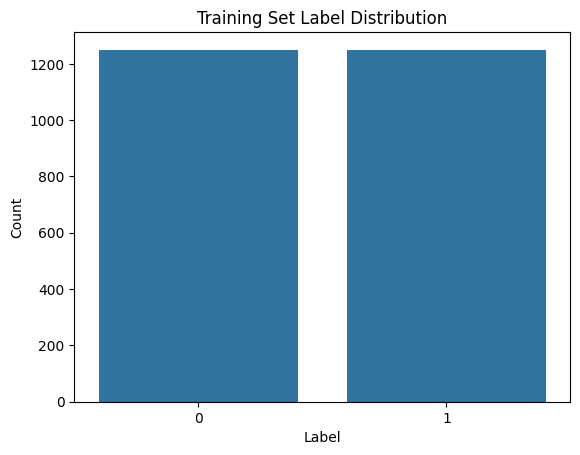

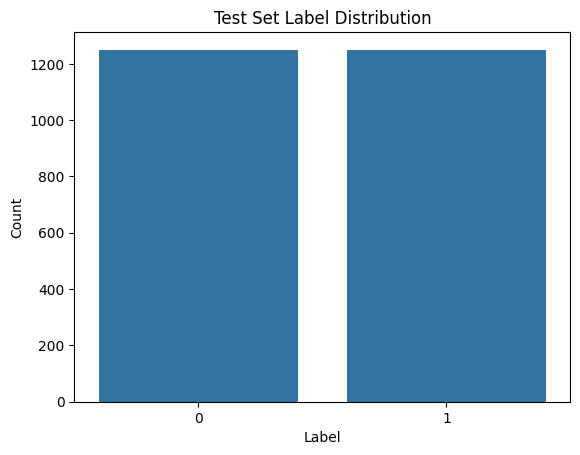

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
from collections import Counter
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')
dataset = load_dataset('imdb')

def reduce_dataset(dataset, factor=10):
    reduced_dataset = {}
    for split in dataset.keys():
        labels = np.array(dataset[split]['label'])
        num_per_class = (len(labels) // (2 * factor))

        indices_0 = np.where(labels == 0)[0][:num_per_class]
        indices_1 = np.where(labels == 1)[0][:num_per_class]

        indices = np.concatenate([indices_0, indices_1])
        np.random.shuffle(indices)

        reduced_dataset[split] = dataset[split].select(indices.tolist())
    return reduced_dataset

reduced_dataset = reduce_dataset(dataset)
train_df = pd.DataFrame(reduced_dataset['train'])
test_df = pd.DataFrame(reduced_dataset['test'])


def plot_label_distribution(df, title):
    sns.countplot(x='label', data=df)
    plt.title(title)
    plt.xlabel('Label')
    plt.ylabel('Count')
    plt.show()

plot_label_distribution(train_df, 'Training Set Label Distribution')
plot_label_distribution(test_df, 'Test Set Label Distribution')

stop_words = set(stopwords.words('english'))

Se ve una buena distribucion de labels, forzada dentro de la reduccion de dataset.

In [7]:
def get_word_frequencies(df):
    all_words = []
    for text in df['text']:
        words = word_tokenize(text.lower())
        filtered_words = [word for word in words if word.isalnum() and word not in stop_words]
        all_words.extend(filtered_words)
    word_freq = Counter(all_words)
    return word_freq

train_word_freq = get_word_frequencies(train_df)
test_word_freq = get_word_frequencies(test_df)

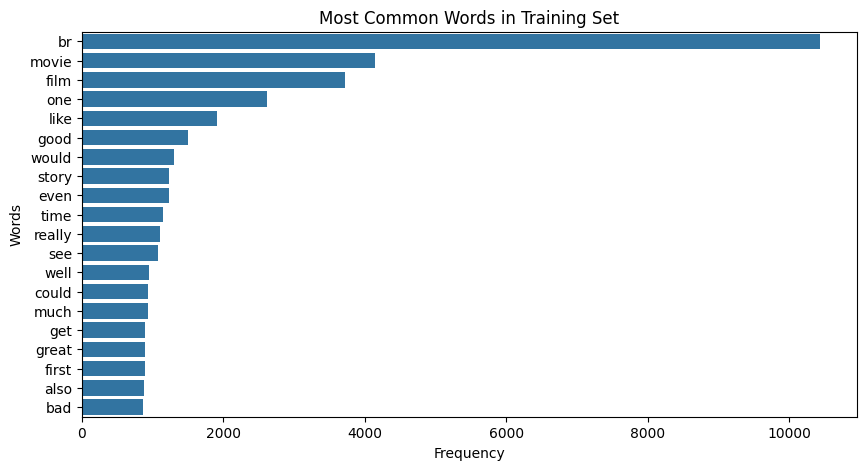

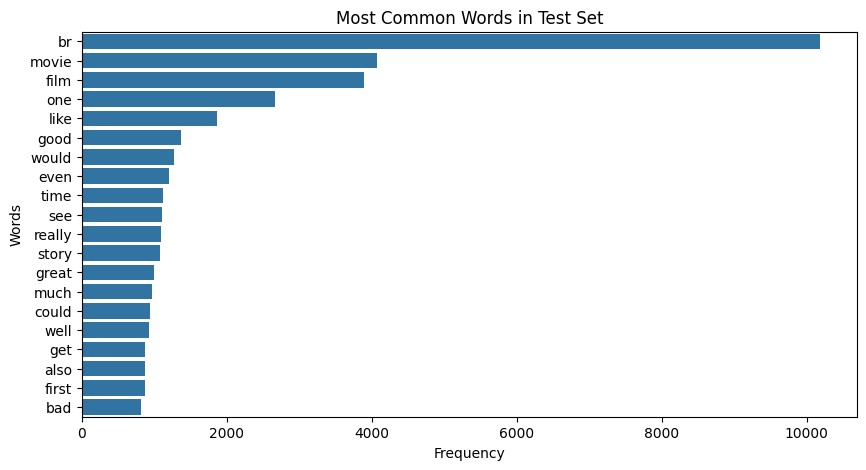

In [8]:
def plot_most_common_words(word_freq, title, n=20):
    common_words = word_freq.most_common(n)
    words, counts = zip(*common_words)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=counts, y=words)
    plt.title(title)
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.show()

plot_most_common_words(train_word_freq, 'Most Common Words in Training Set')
plot_most_common_words(test_word_freq, 'Most Common Words in Test Set')

Frecuancias muy similares, para test y train, con pequeñas diferencias visibles.

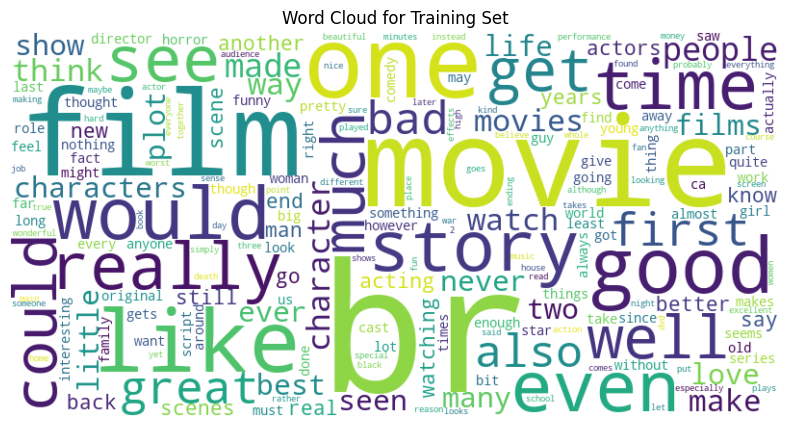

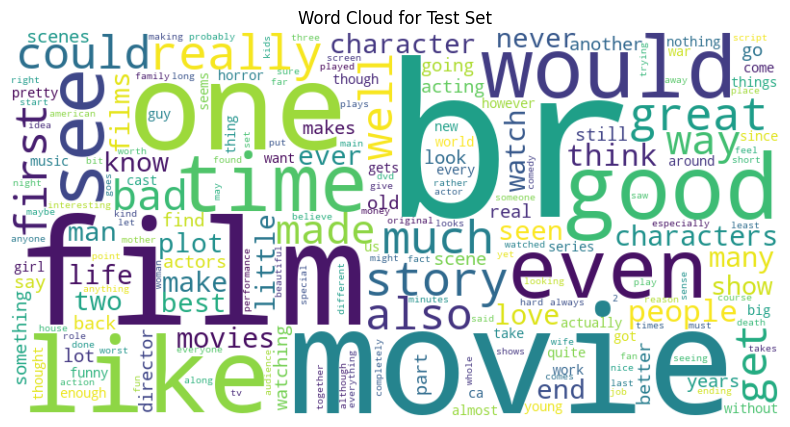

In [9]:
def plot_word_cloud(word_freq, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

plot_word_cloud(train_word_freq, 'Word Cloud for Training Set')
plot_word_cloud(test_word_freq, 'Word Cloud for Test Set')


Una manera mas visual de ver la presencia de cada palabra. 